# Simulate Bernoulli Distribution from Sample
Using Julia, fit a data sample to a Bernoulli distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. A Bernoulli distribution is parameterized by a success rate p, which takes value 1 with probability p and 0 with probability 1-p.

## 0. Import packages and define SimulateBernoulliDistributionFromSample function
Install (if necessary) and import the functions necessary to run the SimulateBernoulliDistributionFromSample function. Then define the function for later use. 

In [28]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateBernoulliDistributionFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    Param_BernoulliDistSim = fit(Bernoulli, dataframe[:, column_name])
    println("Probability of success (p) used in simulation: ", Param_BernoulliDistSim.p)
    # Conduct simulation
    Arr_BernoulliDistSim = rand(Param_BernoulliDistSim, trials, 1)
    DF_BernoulliDistSim = DataFrame(Arr_BernoulliDistSim, :auto)
    # Group and summarize by outcomes
    GDF_BernoulliDistSim = groupby(DF_BernoulliDistSim, "x1")
    GDF_BernoulliDistSim = combine(GDF_BernoulliDistSim, nrow)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_BernoulliDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Bernoulli Distribution: " * column_name
        p = bar(
            GDF_BernoulliDistSim[:, "x1"], 
            GDF_BernoulliDistSim[:, "nrow"],
            fillalpha= 0.4, 
            label= "Simulated Outcomes", 
            title= title_for_plot, 
            xlabel= column_name,
            xticks= 0:1:1
        )
        plot!(kde_simulation.x, kde_simulation.density .* length(DF_BernoulliDistSim[:, "x1"]) .* 0.175, linewidth = 3, color = 1, label="Density of Simulation")
        plot!(kde_sample.x, kde_sample.density .* length(DF_BernoulliDistSim[:, "x1"]) .* 0.5, linewidth = 3, color = 2, label="Density of Sample")
        display(p)
    end
    # Return simulation results
    return DF_BernoulliDistSim
end

SimulateBernoulliDistributionFromSample (generic function with 5 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [2]:
Arr_RandomNumbers = rand(0:1, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

,x1
,Int64
1,0
2,1
3,0
4,0
5,1
6,1
7,1
8,0
9,1


## 2. Use the SimulateBernoulliDistributionFromSample function
Use the SimulateBernoulliDistributionFromSample function to simulate a Bernoulli distribution from your sample dataset.

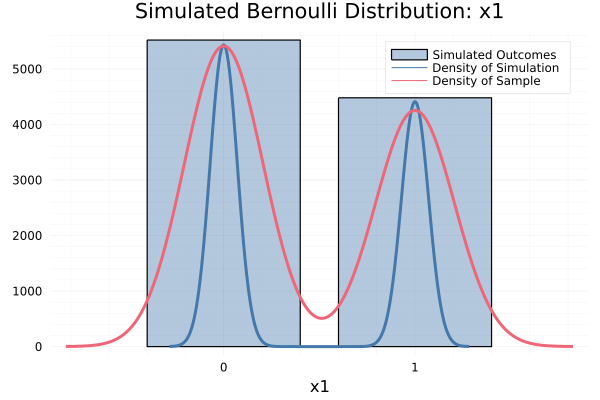

Probability of success (p) used in simulation: 0.44


,x1
,Bool
1,1
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [29]:
DF_Sim = SimulateBernoulliDistributionFromSample(DF_RandomNumbers, "x1")